In [44]:
# Utilizamos numpy para generar datos sinteticos para saber que sucede con nuestro modelo
from turtle import xcor
import numpy as np
import pandas as pd  # Utilizamos pandas para el manejo de datos
# Utilizamos matplotlib para poder gráficar nuestra información
import matplotlib.pyplot as plt
from sklearn import preprocessing  # Y utilizamos el modulo de preprocesamiento
# Importamos el modulo de KNN porque vamos a utilizar un modelo de knn para poder lograr una solución
from sklearn.neighbors import KNeighborsClassifier

In [45]:
prospectos = pd.read_csv("datos_prestamo.csv")

In [46]:
prospectos

,Unnamed: 0,Fecha_registro,Fecha_contacto,Id,Genero,Casado,Dependientes,Educacion,Trabaja_para_el,Salario,Salario_Pareja,Credito_pedido,Plazo_prestamo,Historial_crediticio,Area_vivienda,Estatus_prestamo,Asesor_asignado
0,0,02/26/2019 11:00 AM,02/27/2019 12:03 PM,LP002519,Hombre,Si,3+,Graduado,No,4691,0.0,100.0,360.0,1.0,Semiurbana,Si,Dudley
1,1,02/27/2019 02:52 PM,02/26/2019 07:43 AM,LP001280,Hombre,Si,2,No Graduado,No,3333,2000.0,99.0,360.0,NaN,Semiurbana,Si,Pablo
2,2,02/27/2019 08:18 AM,02/28/2019 02:27 PM,LP001151,Mujer,No,0,Graduado,No,4000,2275.0,144.0,360.0,1.0,Semiurbana,Si,Dudley
3,3,02/28/2019 10:00 AM,03/01/2019 12:57 PM,LP002036,Hombre,Si,0,Graduado,No,2058,2134.0,88.0,360.0,NaN,Urabana,Si,Ana
4,4,02/26/2019 07:40 AM,02/27/2019 04:35 PM,LP002894,Mujer,Si,0,Graduado,No,3166,0.0,36.0,360.0,1.0,Semiurbana,Si,Regina
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
552,552,02/27/2019 08:22 AM,02/28/2019 01:04 PM,LP002894,Mujer,Si,0,Graduado,No,3166,0.0,36.0,360.0,1.0,Semiurbana,Si,Pablo
553,553,02/27/2019 10:40 AM,02/28/2019 01:10 PM,LP002315,Hombre,Si,1,Graduado,No,8300,0.0,152.0,300.0,0.0,Semiurbana,No,NaN
554,554,02/28/2019 10:32 AM,03/01/2019 02:20 PM,LP002225,Hombre,Si,2,Graduado,No,5391,0.0,130.0,360.0,1.0,Urabana,Si,Ana
555,555,02/26/2019 09:48 AM,02/27/2019 01:28 PM,LP002807,Hombre,Si,2,No Graduado,No,3675,242.0,108.0,360.0,1.0,Semiurbana,Si,Pablo


In [47]:
prospectos['Estatus_prestamo'].value_counts()

Si    440
No    117
Name: Estatus_prestamo, dtype: int64

array([[<AxesSubplot:title={'center':'Credito_pedido'}>]], dtype=object)

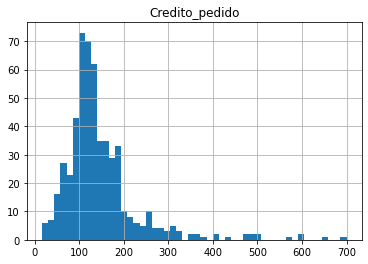

In [48]:
prospectos.hist(column='Credito_pedido', bins=50)

In [49]:
prospectos.columns

Index(['Unnamed: 0', 'Fecha_registro', 'Fecha_contacto', 'Id', 'Genero',
       'Casado', 'Dependientes', 'Educacion', 'Trabaja_para_el', 'Salario',
       'Salario_Pareja', 'Credito_pedido', 'Plazo_prestamo',
       'Historial_crediticio', 'Area_vivienda', 'Estatus_prestamo',
       'Asesor_asignado'],
      dtype='object')

In [50]:
x = prospectos[['Fecha_registro', 'Fecha_contacto', 'Id', 'Genero', 'Casado',
                'Dependientes', 'Educacion', 'Trabaja_para_el', 'Salario',
               'Salario_Pareja', 'Credito_pedido', 'Plazo_prestamo',
                'Historial_crediticio', 'Area_vivienda',
                'Asesor_asignado']] .values
print(x[0:5])

[['02/26/2019 11:00 AM' '02/27/2019 12:03 PM' 'LP002519' 'Hombre' 'Si'
  '3+' 'Graduado' 'No' 4691 0.0 100.0 360.0 1.0 'Semiurbana' 'Dudley']
 ['02/27/2019 02:52 PM' '02/26/2019 07:43 AM' 'LP001280' 'Hombre' 'Si'
  '2' 'No Graduado' 'No' 3333 2000.0 99.0 360.0 nan 'Semiurbana' 'Pablo']
 ['02/27/2019 08:18 AM' '02/28/2019 02:27 PM' 'LP001151' 'Mujer' 'No' '0'
  'Graduado' 'No' 4000 2275.0 144.0 360.0 1.0 'Semiurbana' 'Dudley']
 ['02/28/2019 10:00 AM' '03/01/2019 12:57 PM' 'LP002036' 'Hombre' 'Si'
  '0' 'Graduado' 'No' 2058 2134.0 88.0 360.0 nan 'Urabana' 'Ana']
 ['02/26/2019 07:40 AM' '02/27/2019 04:35 PM' 'LP002894' 'Mujer' 'Si' '0'
  'Graduado' 'No' 3166 0.0 36.0 360.0 1.0 'Semiurbana' 'Regina']]


In [53]:
y = prospectos['Estatus_prestamo'].values
y[0:5]

array(['Si', 'Si', 'Si', 'Si', 'Si'], dtype=object)

In [57]:
categorias=prospectos.filter(['Fecha_registro', 'Fecha_contacto','Genero', 'Casado','Educacion','Trabaja_para_el','Area_vivienda',
                'Asesor_asignado'])

In [58]:
categorias.head(10)

,Fecha_registro,Fecha_contacto,Genero,Casado,Educacion,Trabaja_para_el,Area_vivienda,Asesor_asignado
0,02/26/2019 11:00 AM,02/27/2019 12:03 PM,Hombre,Si,Graduado,No,Semiurbana,Dudley
1,02/27/2019 02:52 PM,02/26/2019 07:43 AM,Hombre,Si,No Graduado,No,Semiurbana,Pablo
2,02/27/2019 08:18 AM,02/28/2019 02:27 PM,Mujer,No,Graduado,No,Semiurbana,Dudley
3,02/28/2019 10:00 AM,03/01/2019 12:57 PM,Hombre,Si,Graduado,No,Urabana,Ana
4,02/26/2019 07:40 AM,02/27/2019 04:35 PM,Mujer,Si,Graduado,No,Semiurbana,Regina
5,02/27/2019 08:07 AM,02/28/2019 12:42 PM,Mujer,Si,Graduado,No,Semiurbana,Pablo
6,02/27/2019 10:19 AM,02/28/2019 05:26 PM,Mujer,Si,Graduado,No,Semiurbana,Pablo
7,02/28/2019 10:34 AM,03/01/2019 01:43 PM,Hombre,Si,Graduado,No,Semiurbana,Ana
8,02/27/2019 09:14 AM,02/28/2019 03:54 PM,Hombre,No,Graduado,No,Rural,Pablo
9,02/27/2019 08:44 AM,02/28/2019 03:40 PM,Hombre,Si,No Graduado,No,Semiurbana,Regina


In [63]:
#Empezamos con la genero
categorias.iloc[:,2]

0      Hombre
1      Hombre
2       Mujer
3      Hombre
4       Mujer
        ...  
552     Mujer
553    Hombre
554    Hombre
555    Hombre
556    Hombre
Name: Genero, Length: 557, dtype: object

In [68]:
#Usar las función get_dummies
cat_numerica=pd.get_dummies(categorias.iloc[:,2], drop_first=False)

In [69]:
cat_numerica

,Hombre,Mujer
0,1,0
1,1,0
2,0,1
3,1,0
4,0,1
...,...,...
552,0,1
553,1,0
554,1,0
555,1,0


In [70]:
cat_numerica=pd.get_dummies(categorias, drop_first=True)

In [71]:
cat_numerica

,Fecha_registro_02/26/2019 07:01 AM,Fecha_registro_02/26/2019 07:03 AM,Fecha_registro_02/26/2019 07:05 AM,Fecha_registro_02/26/2019 07:06 AM,Fecha_registro_02/26/2019 07:07 AM,Fecha_registro_02/26/2019 07:08 AM,Fecha_registro_02/26/2019 07:09 AM,Fecha_registro_02/26/2019 07:10 AM,Fecha_registro_02/26/2019 07:12 AM,Fecha_registro_02/26/2019 07:13 AM,...,Genero_Mujer,Casado_Si,Educacion_No Graduado,Trabaja_para_el_Si,Area_vivienda_Semiurbana,Area_vivienda_Urabana,Asesor_asignado_Dudley,Asesor_asignado_Pablo,Asesor_asignado_Regina,Asesor_asignado_Santiago
0,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,1,0,1,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,1,1,0,1,0,0,1,0,0
2,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,1,0,1,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,1,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,1,1,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
552,0,0,0,0,0,0,0,0,0,0,...,1,1,0,0,1,0,0,1,0,0
553,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,1,0,0,0,0,0
554,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,1,0,0,0,0
555,0,0,0,0,0,0,0,0,0,0,...,0,1,1,0,1,0,0,1,0,0
